<img src = http://i.imgur.com/83ydy1r.png>

##  Latent Semantic Analysis (LSA) and Latent Dirchlet Allocation (LDA)
### Lesson Objectives: 
- Build information and document retrieval pipelines using LSA and LDA 
- Explain LSA, LDA to grandmother 
- Train and test LDA Models 


### Lesson Prereqs: 
- Vector Spaces 
- Similarity Measures: Cosine Similarity, Euclidean Distance 
- TF-IDF 
- Count Vectors 

> **Check**: What is a vector space? 

> **Check**: What is TF-IDF? 

<img src= https://camo.githubusercontent.com/9cc6e73239f696be8e271e8475313629d0fbd090/68747470733a2f2f736e61672e67792f6c62737556322e6a7067> 

<img src = https://camo.githubusercontent.com/b0e55232d21bf1eda7a03c461bbcfa7e14141fb8/68747470733a2f2f736e61672e67792f596467784b7a2e6a7067> 

<img src = https://camo.githubusercontent.com/c674c5254d0f36ab0dff72fc3ab286322bf7012b/68747470733a2f2f736e61672e67792f437472364f4c2e6a7067> 

<img src= https://camo.githubusercontent.com/1267c9c60f2224fd36ed1e98c75a2d5974c15453/68747470733a2f2f736e61672e67792f6f6239556d382e6a7067>

<img src = http://i.imgur.com/sWec30N.png>

<img src = http://i.imgur.com/rcolBSq.png>

In [1]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy 
import warnings
# Suppress warnings from pandas library

warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)

example = ["Machine learning is super fun", "Python is super, super cool", "Statistics is cool, too", 
           "Data science is fun", "Python is great for machine learning", "I like football", 
           "Football is great to watch"]

vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10)

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
"Python is super, super cool",1,0,0,0,0,0,0,0,1,0,0,2,0
"Statistics is cool, too",1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [2]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns =
vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
component_1,0.280004,0.035353,0.033417,0.223993,0.178307,0.338085,0.004555,0.338085,0.391281,0.035353,0.038169,0.672310,0.028861
component_2,0.365270,-0.064548,-0.298349,-0.168056,-0.478428,-0.366379,-0.082792,-0.366379,0.001036,-0.064548,0.101363,0.424306,-0.215557


In [3]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.95702439393037986,
  0.85648370973755494,
  0.56335489155638829,
  0.70417108799801786,
  0.71728390345517257,
  0.099136388426341648,
  0.23561831047045323],
 [-0.29000742994307738,
  0.5161740549022158,
  0.82621502416712933,
  -0.71003033655449399,
  -0.69678102861954461,
  -0.99507385479158361,
  -0.97184567281593093])

Populating the interactive namespace from numpy and matplotlib


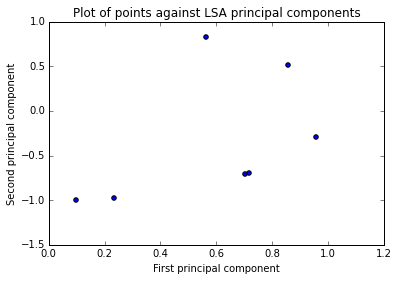

In [4]:
# Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')

Populating the interactive namespace from numpy and matplotlib


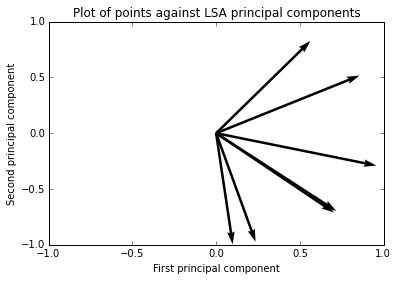

In [5]:
# Plot scatter plot of points with vectors
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
plt.draw()
plt.show()

In [6]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=example, columns=example).head(10)

,Machine learning is super fun,"Python is super, super cool","Statistics is cool, too",Data science is fun,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,1.000000,0.669981,0.299536,0.879823,0.888530,0.383455,0.507335
"Python is super, super cool",0.669981,1.000000,0.908975,0.236612,0.254682,-0.428723,-0.299838
"Statistics is cool, too",0.299536,0.908975,1.000000,-0.189940,-0.171606,-0.766296,-0.670217
Data science is fun,0.879823,0.236612,-0.189940,1.000000,0.999826,0.776342,0.855956
Python is great for machine learning,0.888530,0.254682,-0.171606,0.999826,1.000000,0.764458,0.846169
I like football,0.383455,-0.428723,-0.766296,0.776342,0.764458,1.000000,0.990417
Football is great to watch,0.507335,-0.299838,-0.670217,0.855956,0.846169,0.990417,1.000000


### <a href = http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/> LDA for Grandmas (15 Minute Read) </a>

<a href=https://www.youtube.com/watch?v=3mHy4OSyRf0> LDA Introduction </a>

## First, choose K topics

Kind of like KNN but we are deciding, up front, on a preset number of topics.

## Calculate Word / Topic Probabilities

![](https://snag.gy/yx9grm.jpg)

**For each possible topic Z, and each word:**
1. Multiply the frequency of the word by the total number of words already in topic Z

This gives us a probability that each word exists in the preset number of topics.

> The term here that is unfamilliar is a hyperparameter, *alpha*.  In this case, alpha is a scaler that helps minimize an error term.  Thankfully, most LDA models that are implented will set this automatically and it's usually, 95% of the time, a fine solution.  To really get a strong handle of the math behind this model, there are whitepapers you can read.  Also, having a strong handle on Bayesian statistis is a must to really grasp this model at it's lowest levels.  We are not going there today!

> One problem **alpha** solves is leaving the window of opportunity open when a word may only belong in a single topic, that doesn't exist in any others.




## Calculate Word / Topic Probabilities

![](https://snag.gy/yx9grm.jpg)

**For each possible topic Z, and each word:**
1. Multiply the frequency of the word by the total number of words already in topic Z

This gives us a probability that each word exists in the preset number of topics.

> The term here that is unfamilliar is a hyperparameter, *alpha*.  In this case, alpha is a scaler that helps minimize an error term.  Thankfully, most LDA models that are implented will set this automatically and it's usually, 95% of the time, a fine solution.  To really get a strong handle of the math behind this model, there are whitepapers you can read.  Also, having a strong handle on Bayesian statistis is a must to really grasp this model at it's lowest levels.  We are not going there today!

> One problem **alpha** solves is leaving the window of opportunity open when a word may only belong in a single topic, that doesn't exist in any others.

## LDA Intuition
 
Using the previous assumption about how words are assigned to topics, as we iterate through each word in our corpus, and assign to topics:

1. Words become more common in topics where they are already common.
1. Topics will become more common in documents where they are already common.

**With LDA**:
- Words are assigned to topics randomly at first
- As words are found to be consistently distributed within topics, the model achieves a sort of balance based on the distribution of words accross all documents.

### (Optional) LDA Math...

<img src= http://i.imgur.com/HRRK6k0.png>

### Parameters of LDA

$\alpha$ and $\beta$ Hyperparameters: 
- $\alpha$ represents document-topic density and Beta represents topic-word density. Higher the value of $\alpha$, documents are composed of more topics and lower the value of $\alpha$, documents contain fewer topics. 

- On the other hand, higher the $\beta$, topics are composed of a large number of words in the corpus, and with the lower value of beta, they are composed of few words.

Number of Topics – Number of topics to be extracted from the corpus. Researchers have developed approaches to obtain an optimal number of topics by using Kullback Leibler Divergence Score. 

Number of Topic Terms – Number of terms composed in a single topic. It is generally decided according to the requirement. If the problem statement talks about extracting themes or concepts, it is recommended to choose a higher number, if problem statement talks about extracting features or terms, a low number is recommended.

Number of Iterations / passes – Maximum number of iterations allowed to LDA algorithm for convergence.



## LDA Challenges

1. **There's a bit of entropy to topics.**
There can be between %1-10 shift in what is generated in LDA models.  You may not get the same thing 2x!

1. **Can be very difficult to assess.**
If you have a large corpus, with many topics (>10), it's damn near impossible to visualize the distribution of documents to topics.

1. **Preprocessing is heavy.**
To get the most out of LDA, cleaning stopwords, and specific language can be a challenging task.  Sometimes it's difficult to avoid the noise involved with this model.

1. **SME is necessary for accurate topic assessment.**
The more straight forward your text is, the less subject matter expertise is required.  A more advanced use of LDA would involve assessing documents with lots of idiomtic language. Knowing what topics are found, can be subjective.

1.  **Determining what topics mean, is tricky.**
A collection of world probabiltiies generally isn't very intuitive.  You could take the first word and use that as your topic "label".  Hence, subject matter expertise.

1. **LDA is unsupervised.**
It's not possible to know what is "correct".  The repsonse topics are generated, hence this is why LDA is known as a "generative" model. 

1. **Tuning your LDA model can be tough."**
With other unsupervised models, it's possible to tune for the parameter **K** *number of topics*, but it's not necessarily a very accurate method.  There are things you can do to assess the main paramter **K**.



## LDA Strengths

1. **It can be very strong performer in production.**
After you build the model, it can easily be used "online".
> "Online" training allows you to update your model with more training data without having to refit all your data.  Only new data can be fit globally.

1.  **It's easy to get a quick sense of what a large body of text is broadly "about", without having to read all of it.** Rather than reading 12k PDF's on corproate policies, you could extract the text, and run LDA to see what generalities it finds.
1.  **Easily classify / tag documents by topic.**
1.  **It can "just work" out of the box.**  However, your mileage will vary depending on your preprocessing.

## Other Types of LDA models

- Topics Over Time
- Dynamic Topic Modeling
- Hierarchical LDA
- Pachinko Allocation 

A cool new LDA model to look out for:

- LDA2Vec

### Evaluating LDA: 
- Perplexity to Evaluate: <a href=https://www.youtube.com/watch?v=OHyVNCvnsTo> Stanford NLP </a> 
- Extrinsic Evaluations: Human Evaluation, Mechanical Turkers

## LDA Codealong

In [14]:
#from gensim import corpora, models, matutils
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
import pandas as pd


doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."

# compile sample documents into a list
documents = [doc_a, doc_b, doc_c, doc_d, doc_e]
df        = pd.DataFrame(documents, columns=['text'])

In [2]:
df

,text
0,Brocolli is good to eat. My brother likes to e...
1,My mother spends a lot of time driving my brot...
2,Some health experts suggest that driving may c...
3,I often feel pressure to perform well at schoo...
4,Health professionals say that brocolli is good...


In [5]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.append('mother')
custom_stop_words.append('brother')

In [6]:
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(df['text'])


## Check out the tokens that were saved, after stopword removal.

Each token, has a value of it's feature offset in the internal matrix.

In [7]:
vectorizer.vocabulary_


{u'baseball': 0,
 u'better': 1,
 u'blood': 2,
 u'brocolli': 3,
 u'cause': 4,
 u'drive': 5,
 u'driving': 6,
 u'eat': 7,
 u'experts': 8,
 u'feel': 9,
 u'good': 10,
 u'health': 11,
 u'increased': 12,
 u'likes': 13,
 u'lot': 14,
 u'perform': 15,
 u'practice': 16,
 u'pressure': 17,
 u'professionals': 18,
 u'say': 19,
 u'school': 20,
 u'spends': 21,
 u'suggest': 22,
 u'tension': 23,
 u'time': 24}

## Counts of tokens

What is being counted?

_Warning: big ugly sparse matrix ahead._

In [8]:
docs = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
docs.sum()

baseball         1
better           1
blood            1
brocolli         3
cause            1
drive            1
driving          2
eat              2
experts          1
feel             1
good             3
health           3
increased        1
likes            1
lot              1
perform          1
practice         1
pressure         2
professionals    1
say              1
school           1
spends           1
suggest          1
tension          1
time             1
dtype: int64

## Setup LDA Model!

First we setup the vocabulary.  We could do this in 1 of 2 ways.  The quick and dirty way is to build a dictionary with a keys representing the feature offset of the tokens in the matrix, with the tokens as values.

In [9]:
# This is the fastest way to swap a dictionary key / value order.  This is the format gensim LDA expects it's vocabulary.
vocab = {v: k for k, v in vectorizer.vocabulary_.iteritems()}
vocab

{0: u'baseball',
 1: u'better',
 2: u'blood',
 3: u'brocolli',
 4: u'cause',
 5: u'drive',
 6: u'driving',
 7: u'eat',
 8: u'experts',
 9: u'feel',
 10: u'good',
 11: u'health',
 12: u'increased',
 13: u'likes',
 14: u'lot',
 15: u'perform',
 16: u'practice',
 17: u'pressure',
 18: u'professionals',
 19: u'say',
 20: u'school',
 21: u'spends',
 22: u'suggest',
 23: u'tension',
 24: u'time'}

In [10]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'who... 'their', 'rather', 'without', 'so', 'five', 'the', 'first', 'whereas', 'once', 'mother', 'brother'],
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

## Default token mapping method
Otherwise, you can use this dictionary method that is much more standard for working with gensim models for the id2word parameter of the model.  

**Why would you use this instead?**

The main advantage is that this dictionary method allows for quick helper functions that allow you to quickly access common points of interest like tokens, token -> id mappings.  However, there are some performance advantages if you ever want to save your model to a file, then load it at a later time.  Because the tokenizations can take a while to be computed, you can save these post computed items to file, then load them from disk later which is quite a bit faster.  Also, it's possible to add new documents to your corpus without having to re-tokenize your entire set.  This is great for online systems that can take new documents on demmand.  

As you work with larger datasets with text, this is a much better way to handle LDA and other Gensim models from a performance point of view.

In [11]:
bow = []

for document in X.toarray():
    
    single_document = []
    
    for token_id, token_count in enumerate(document):

        if token_count > 0:
            single_document.append((token_id, token_count))

    bow.append(single_document)
    
bow

[[(3, 2), (7, 2), (10, 2), (13, 1)],
 [(0, 1), (6, 1), (14, 1), (16, 1), (21, 1), (24, 1)],
 [(2, 1), (4, 1), (6, 1), (8, 1), (11, 1), (12, 1), (17, 1), (22, 1), (23, 1)],
 [(1, 1), (5, 1), (9, 1), (15, 1), (17, 1), (20, 1)],
 [(3, 1), (10, 1), (11, 2), (18, 1), (19, 1)]]

In [15]:
# remove words that appear only once
frequency = defaultdict(int)

for text in documents:
    for token in text.split():
        frequency[token] += 1

texts = [[token for token in text.split() if frequency[token] > 1 and token not in stops]
          for text in documents]

# Create gensim dictionary object
dictionary = corpora.Dictionary(texts)

# Create corpus matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [16]:
corpus

[[(0, 2), (1, 1), (2, 1)],
 [(1, 1), (2, 1), (3, 1), (4, 1)],
 [(3, 1)],
 [(2, 1), (4, 1)],
 [(0, 1)]]

## Setup the actual LDA model!
Finally we initialize and assign our model to a variable object!


In [18]:

lda = models.LdaModel(
    matutils.Sparse2Corpus(X, documents_columns=False),
    # or use the corpus object created with the dictionary in the previous frame!
    # corpus, 
    num_topics  =  3,
    passes      =  20,
    id2word     =  vocab
    # or use the gensim dictionary object!
    # id2word     =  dictionary
)


### Ok great, what now?!
Well let's look at the topics already!  These are the topics overall.


In [20]:
lda.print_topics(num_topics=3, num_words=5)

[(0,
  u'0.066*drive + 0.066*feel + 0.066*school + 0.066*better + 0.066*perform'),
 (1,
  u'0.077*driving + 0.077*pressure + 0.077*health + 0.077*increased + 0.077*blood'),
 (2, u'0.156*good + 0.156*brocolli + 0.109*eat + 0.109*health + 0.062*likes')]

In [24]:
##This is how each document scored per topic:
lda.get_document_topics(bow[0])

[(0, 0.041801196137848093),
 (1, 0.041825351040055782),
 (2, 0.91637345282209615)]

## Lets come up with some high level labels
This is the subjective part of LDA.  What do the word probabilties that represent topics mean?  Let's make some up.

In [25]:
topics_labels = {
   0: "Family Stress",
   1: "Driving",
   2: "Food"
}

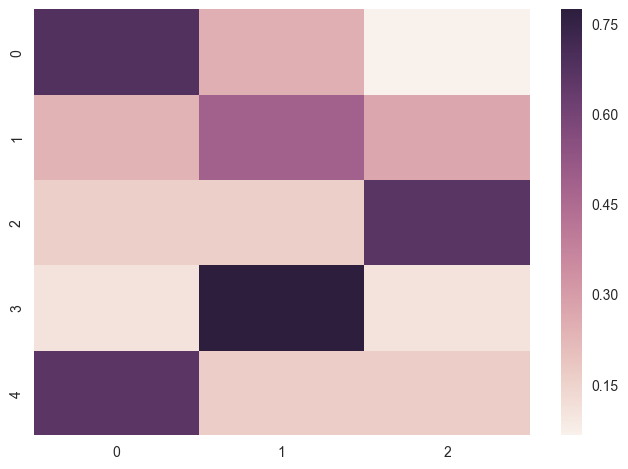

In [26]:
%matplotlib inline
import seaborn as sns

doc_topics = [lda.get_document_topics(doc) for doc in corpus]

doc_topic_probabilities = []

for document in doc_topics:
    
    single_document = []
    
    for topic, probablity in document:
        
        single_document.append(probablity)
        
    doc_topic_probabilities.append(single_document)
    
docs_topics = pd.DataFrame(doc_topic_probabilities)
sns.heatmap(docs_topics)


# doc_topic_probabilities

In [27]:
doc_topics = [lda.get_document_topics(doc) for doc in corpus]

topic_data = []

for document_id, topics in enumerate(doc_topics):
    
    document_topics = []
    
    for topic, probability in topics:
       
        topic_data.append({
            'document_id':  document_id,
            'topic_id':     topic,
            'topic':        topics_labels[topic],
            'probability':  probability
        })

topics_df = pd.DataFrame(topic_data)
topics_df.pivot_table(values="probability", index=["document_id", "topic"]).T

document_id  topic        
0            Driving          0.248424
             Family Stress    0.684073
             Food             0.067503
1            Driving          0.486039
             Family Stress    0.240883
             Food             0.273078
2            Driving          0.167146
             Family Stress    0.167073
             Food             0.665781
3            Driving          0.776452
             Family Stress    0.111791
             Food             0.111757
4            Driving          0.168181
             Family Stress    0.663936
             Food             0.167883
Name: probability, dtype: float64

In [28]:
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

lda = LatentDirichletAllocation(n_topics=3)
lda.fit(X)

print("\nTopics in LDA model:")
tf_feature_names = vectorizer.get_feature_names()
# print_top_words(lda, tf_feature_names, 10)

print lda.score(X)


Topics in LDA model:
-175.837784575


/Users/Vrushank/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


## So what now!?

Well, this is a very basic example.  LDA typically doesn't perform well on very small datasets.  It can be useful to see how it works and to implement, but you should try to see how it behaves on your own.  Finding the optimal number of topics can be tricky.

Generally, you should consider:
- How well topics are applied to documents overall
- The strength of topics overall, to all documents
- Improving preprocessing such as stopword removal
- Exploring LDA Topics [pyLDAvis](https://github.com/bmabey/pyLDAvis/blob/master/README.rst))

These general guidelines should help you tune your hyperparameter **K** for number of topics.

## Additional Resources

<a href=https://www.youtube.com/watch?v=3mHy4OSyRf0> Intro Topic Models </a>

<a href=https://metacademy.org/graphs/concepts/latent_dirichlet_allocation> Technical Resources for LDA </a>